# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [74]:
import numpy as np


class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty="None", alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.reshape(-1, 1)
        # init parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        # gradient descent
        for i in range(self.epochs):
            if (self.penalty == "L1"):
                delta = -(y_train-np.dot(X_train, self.weights) -
                          self.bias)/n_samples
                dw = np.dot(X_train.T, delta)+(self.alpha /
                                               n_samples) * np.sign(self.weights)
                db = np.sum(delta).reshape(1, 1)
            elif (self.penalty == "L2"):
                delta = -(y_train-np.dot(X_train, self.weights) -
                          self.bias)/n_samples
                dw = np.dot(X_train.T, delta) + \
                    (self.alpha/n_samples) * self.weights
                db = np.sum(delta).reshape(1, 1)
            else:
                delta = -(y_train-np.dot(X_train, self.weights) -
                          self.bias)/n_samples
                dw = np.dot(X_train.T, delta)
                db = np.sum(delta).reshape(1, 1)

            # update weights and biases
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X_test):
        y_predicted = np.dot(X_test, self.weights)+self.bias
        return y_predicted


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

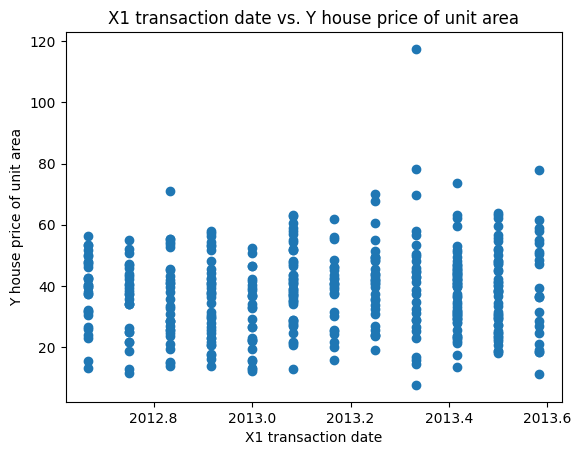

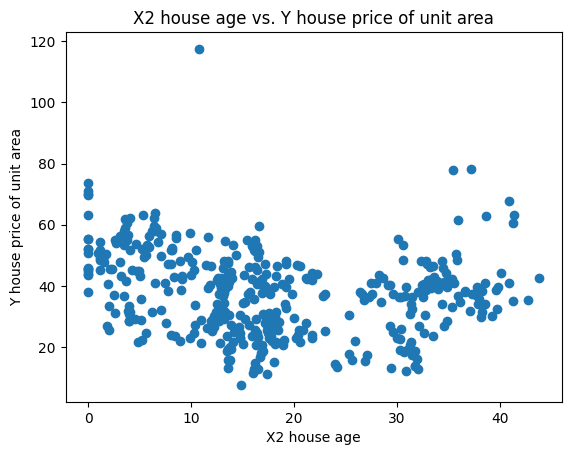

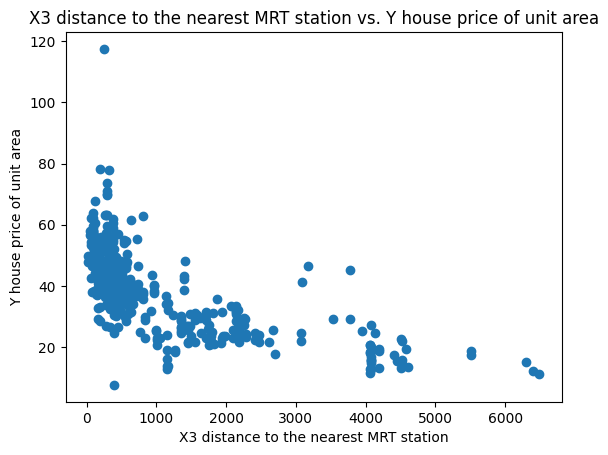

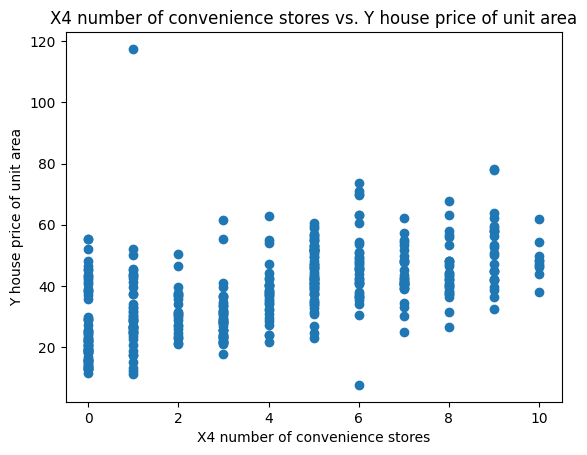

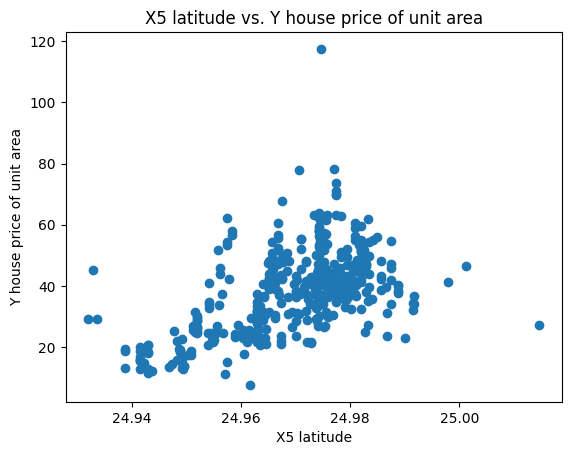

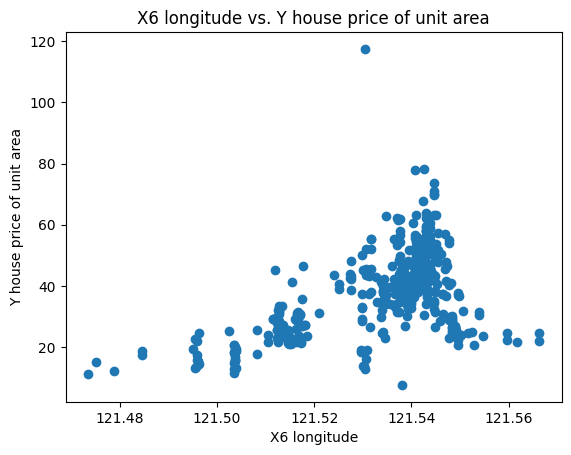

Mean Squared Error: 54.06696193420062
R Squared: 0.6118215584082121 

Mean Squared Error: 54.066966344396114
R Squared: 0.6118215267448311 

Mean Squared Error: 54.06278395263859
R Squared: 0.611851554589128


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty="None", alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.values.reshape(-1, 1)
        # init parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = np.zeros((1, 1))

        # gradient descent
        for i in range(self.epochs):
            if (self.penalty == "L1"):
                delta = -(y_train-np.dot(X_train, self.weights) -
                          self.bias)/n_samples
                dw = np.dot(X_train.T, delta)+(self.alpha /
                                               n_samples) * np.sign(self.weights)
                db = np.sum(delta).reshape(1, 1)
            elif (self.penalty == "L2"):
                delta = -(y_train-np.dot(X_train, self.weights) -
                          self.bias)/n_samples
                dw = np.dot(X_train.T, delta) + \
                    (self.alpha/n_samples) * self.weights
                db = np.sum(delta).reshape(1, 1)
            else:
                delta = -(y_train-np.dot(X_train, self.weights) -
                          self.bias)/n_samples
                dw = np.dot(X_train.T, delta)
                db = np.sum(delta).reshape(1, 1)

            # update weights and biases
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X_test):
        y_predicted = np.dot(X_test, self.weights)+self.bias
        return y_predicted


df = pd.read_csv('real_estate.csv')

# df.isnull().sum()
# no null values

for column in df.columns[1:7]:
    plt.scatter(df[column], df['Y house price of unit area'])
    plt.xlabel(column)
    plt.ylabel('Y house price of unit area')
    plt.title(f'{column} vs. Y house price of unit area')
    plt.show()

# i guess these are not that relevant features
df.drop(['No', 'X1 transaction date'], axis=1, inplace=True)

X = df.iloc[0:414, 0:4]
y = df.iloc[0:414, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression(0.001, 25000, "None", 0)
lr_model.fit(X_train_normalized, y_train)
mse = mean_squared_error(y_test, lr_model.predict(X_test_normalized))
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, lr_model.predict(X_test_normalized))
print('R Squared:', r2, "\n")

# Lasso Regression
lr_model = LinearRegression(0.001, 25000, "L1", 0.01)
lr_model.fit(X_train_normalized, y_train)
mse = mean_squared_error(y_test, lr_model.predict(X_test_normalized))
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, lr_model.predict(X_test_normalized))
print('R Squared:', r2, "\n")

# Ridge Regression
lr_model = LinearRegression(0.001, 25000, "L2", 0.01)
lr_model.fit(X_train_normalized, y_train)
mse = mean_squared_error(y_test, lr_model.predict(X_test_normalized))
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, lr_model.predict(X_test_normalized))
print('R Squared:', r2)


# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [183]:

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

breast = load_breast_cancer()

X = breast.data
y = breast.target

df = pd.DataFrame(X, columns=breast.feature_names)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.25)


5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [182]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))


class LogisticRegression:
    def __init__(self, learning_rate, epochs, penalty="None", alpha=0):
      # Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features, 1)/np.sqrt(n_features)
        self.bias = np.random.randn(1, 1)

        # Implement the GD algortihm
        for i in range(self.epochs):

            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = -np.dot(X.T, (y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples

            if (self.penalty == "L1"):
                dw += (self.alpha / n_samples) * np.sign(self.weights)
            elif (self.penalty == "L2"):
                dw += (self.alpha / n_samples) * self.weights

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i] <= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1
        return y_pred


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [193]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR

logreg = LogisticRegression(0.001, 250000, "None", 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("None:", accuracy_score(y_test, y_pred))

logreg = LogisticRegression(0.001, 250000, "L1", 0.01)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("L1:", accuracy_score(y_test, y_pred))

logreg = LogisticRegression(0.001, 250000, "L2", 0.01)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("L2:", accuracy_score(y_test, y_pred))

print("\nNow for the Sklearn Logistic Regression model,\n")

model = LR(penalty=None, solver="lbfgs", max_iter=250000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("none:", accuracy_score(y_test, y_pred))

model = LR(penalty="l1", solver="liblinear", C=10, max_iter=250000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("l1:", accuracy_score(y_test, y_pred))

model = LR(penalty="l2", solver="lbfgs", C=10, max_iter=250000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("l2:", accuracy_score(y_test, y_pred))


None: 0.9230769230769231
L1: 0.9230769230769231
L2: 0.9300699300699301

Now for the Sklearn Logistic Regression model,

none: 0.9300699300699301
l1: 0.972027972027972
l2: 0.958041958041958


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [180]:
# the best model in all three cases is of scikit-learn

from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, confusion_matrix

model = LR(penalty=None, solver="lbfgs", max_iter=25000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("none:\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

model = LR(penalty="l1", solver="liblinear", C=10, max_iter=25000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("l1:\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")

model = LR(penalty="l2", solver="lbfgs", C=10, max_iter=25000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("l2:\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred), "\n")


none:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.96      0.94      0.95        84

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

[[56  3]
 [ 5 79]] 

l1:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.99      0.96      0.98        84

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[58  1]
 [ 3 81]] 

l2:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.99      0.99      0.99        84

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg   

# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [312]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

df = pd.read_csv('glass.csv')

# extracting the X an y columns
X = df.iloc[0:214, 0:9]
y = df.iloc[0:214, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [313]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
    
X_train=np.array(X_train)    
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

clf=KNN(k=8)
clf.fit(X_train,y_train) 

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [314]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

predictions = clf.predict(X_test)
print(accuracy_score(predictions, y_test))


# creating a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# calculating the accuracy of the classifier
print(accuracy_score(y_pred, y_test))


0.7727272727272727
0.7272727272727273


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

Accuracy (max_depth = 5 ): 0.7272727272727273


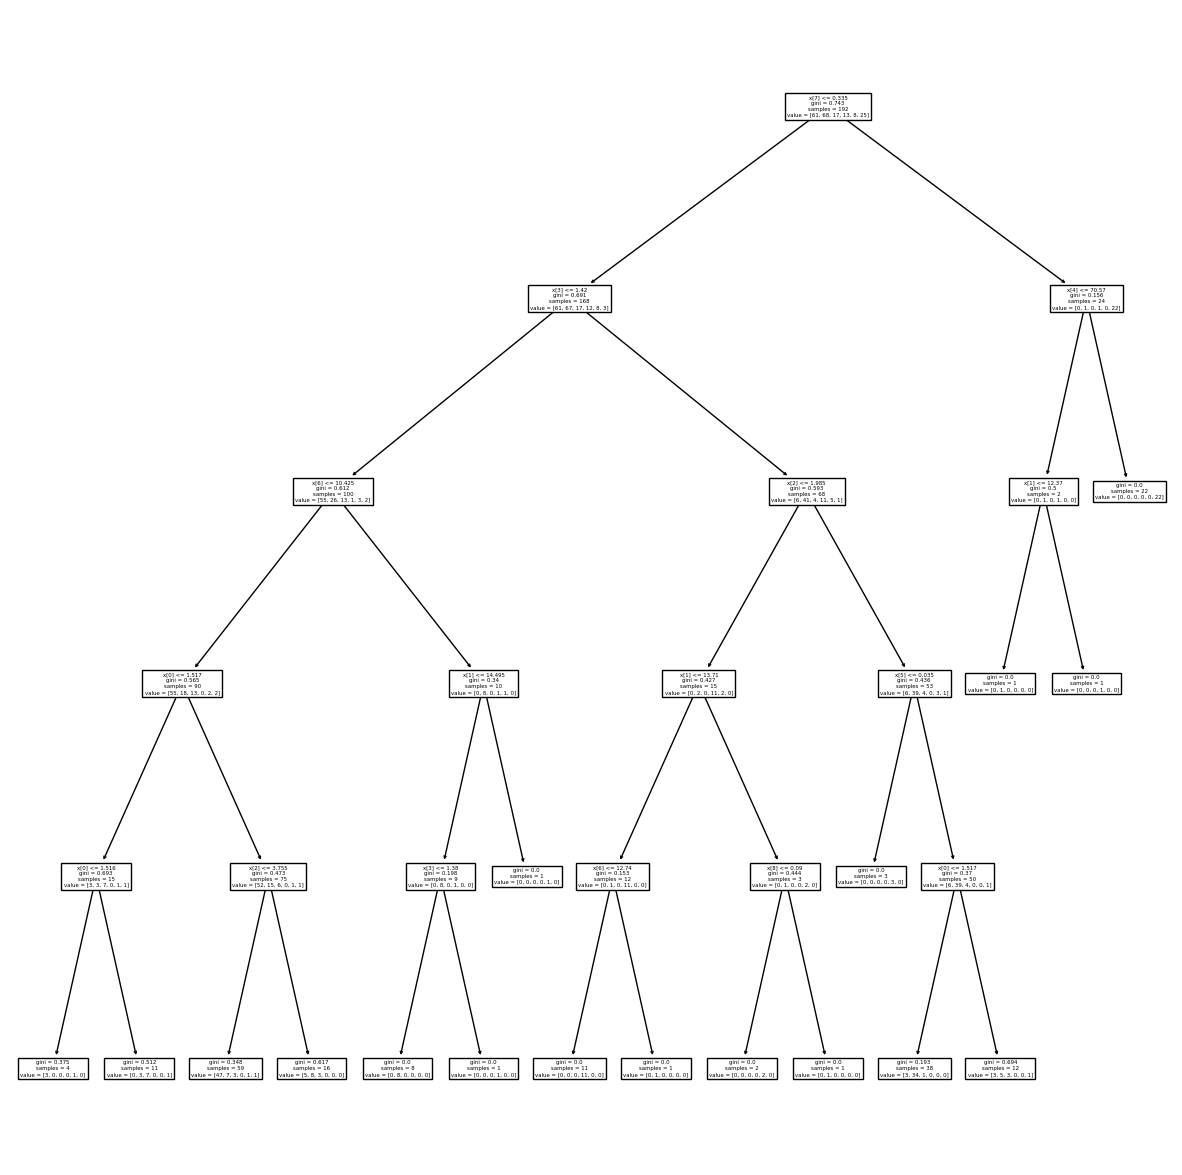

Accuracy (max_depth = 6 ): 0.7727272727272727


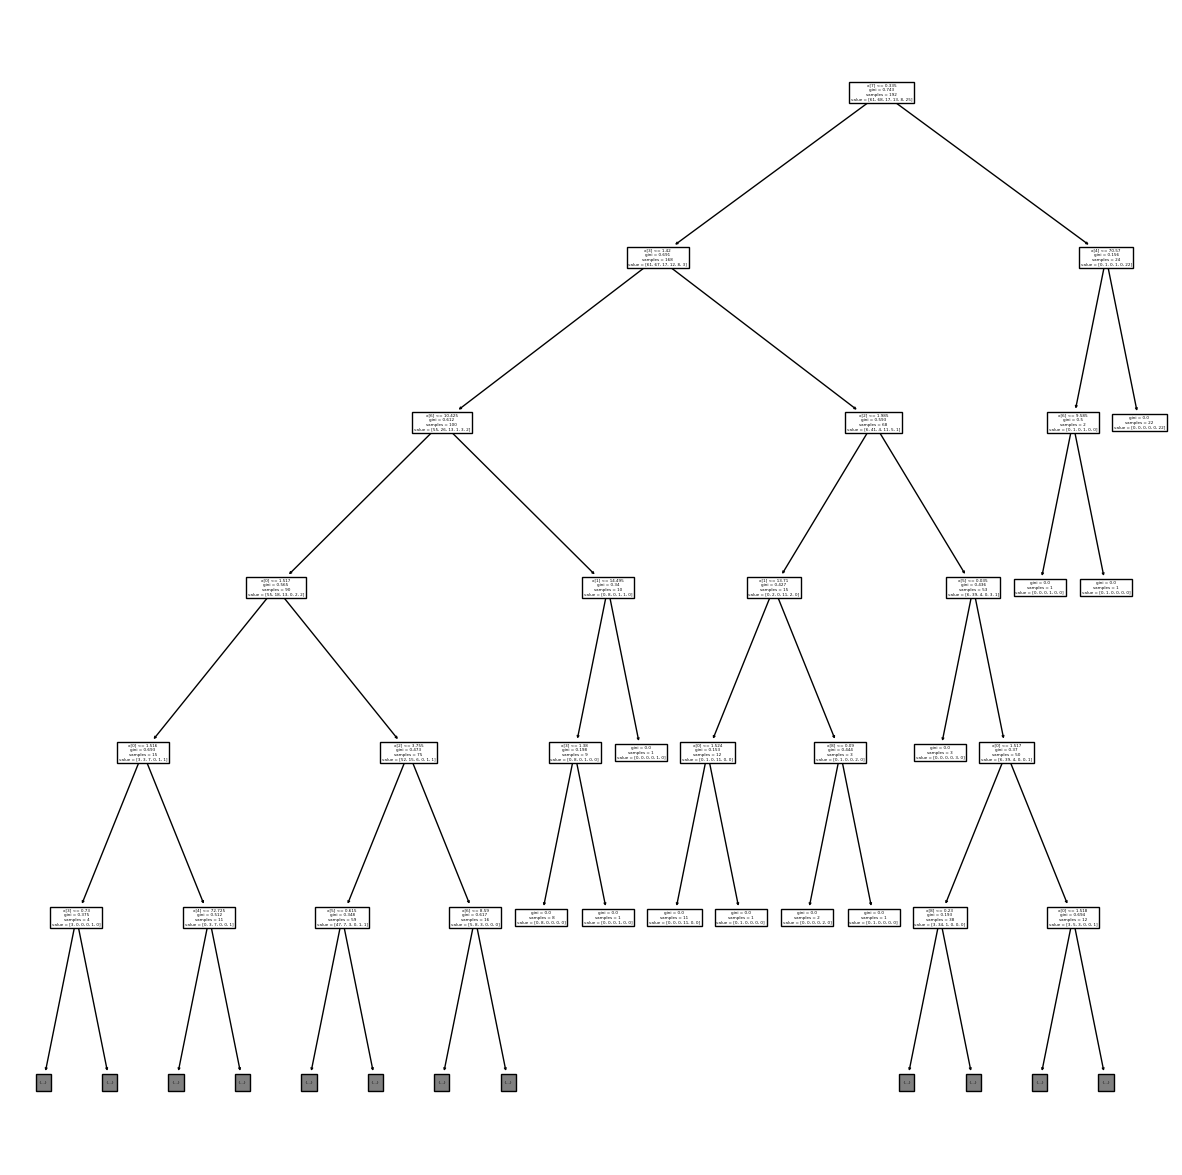

Accuracy (max_depth = 7 ): 0.7727272727272727


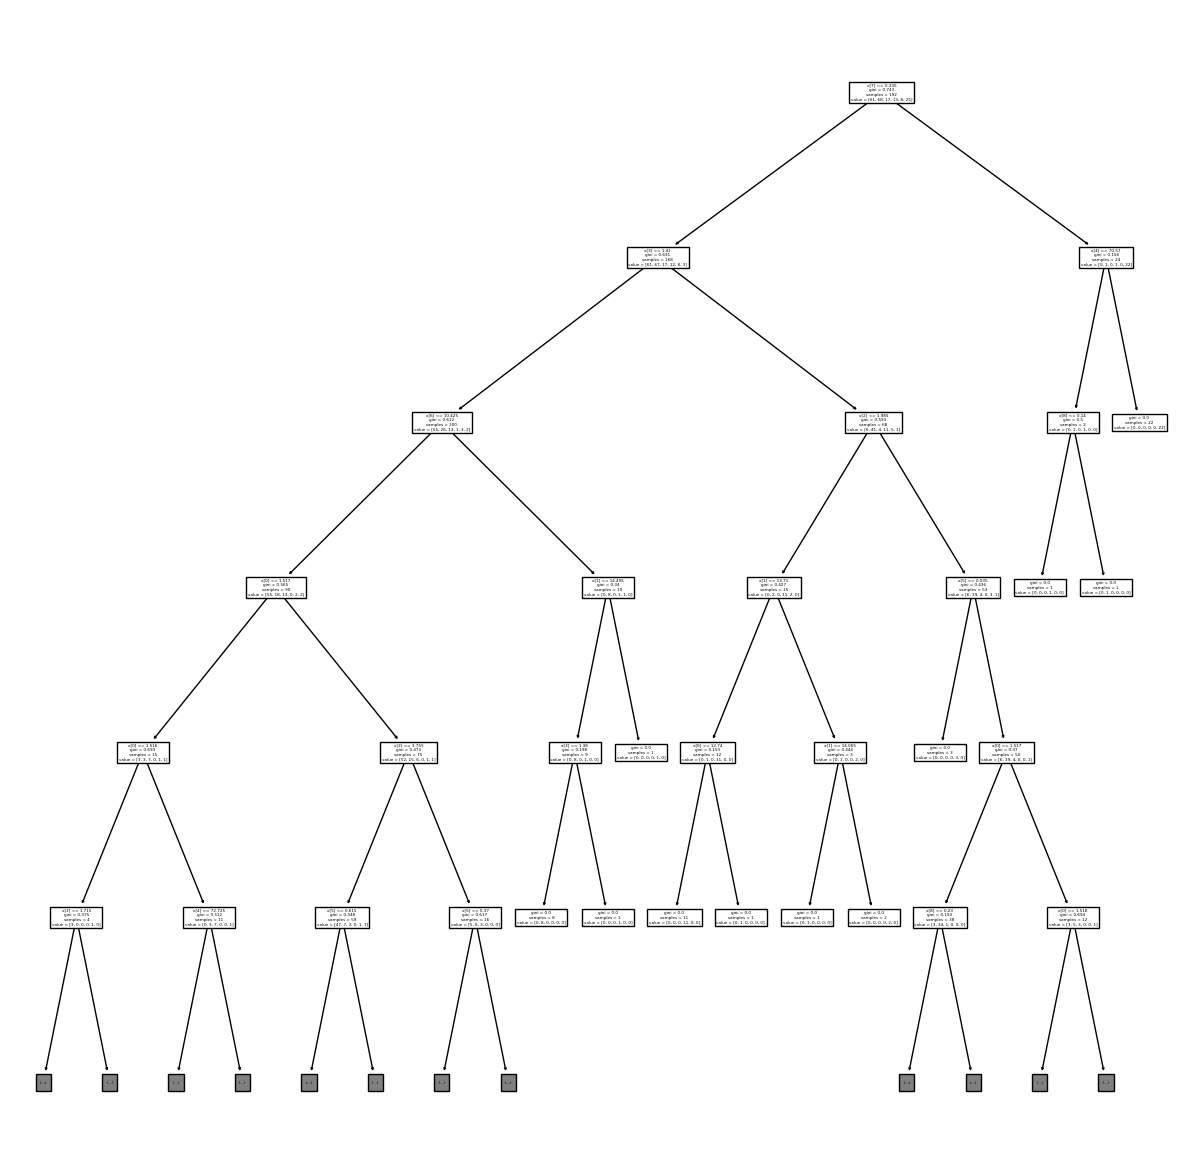

Accuracy (max_depth = 8 ): 0.7727272727272727


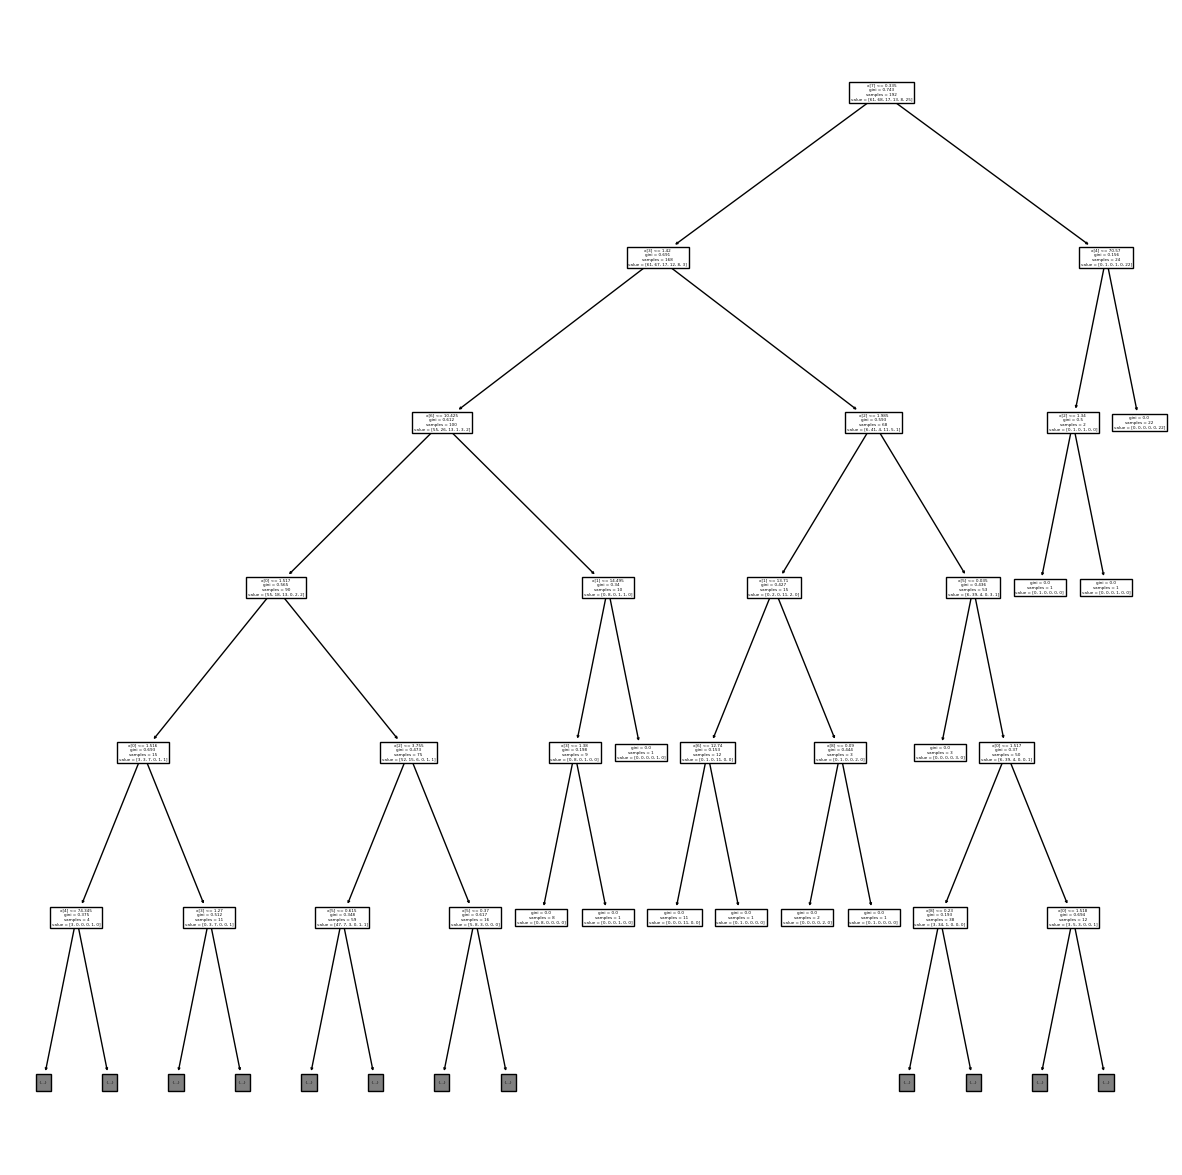

Accuracy (max_depth = 9 ): 0.7727272727272727


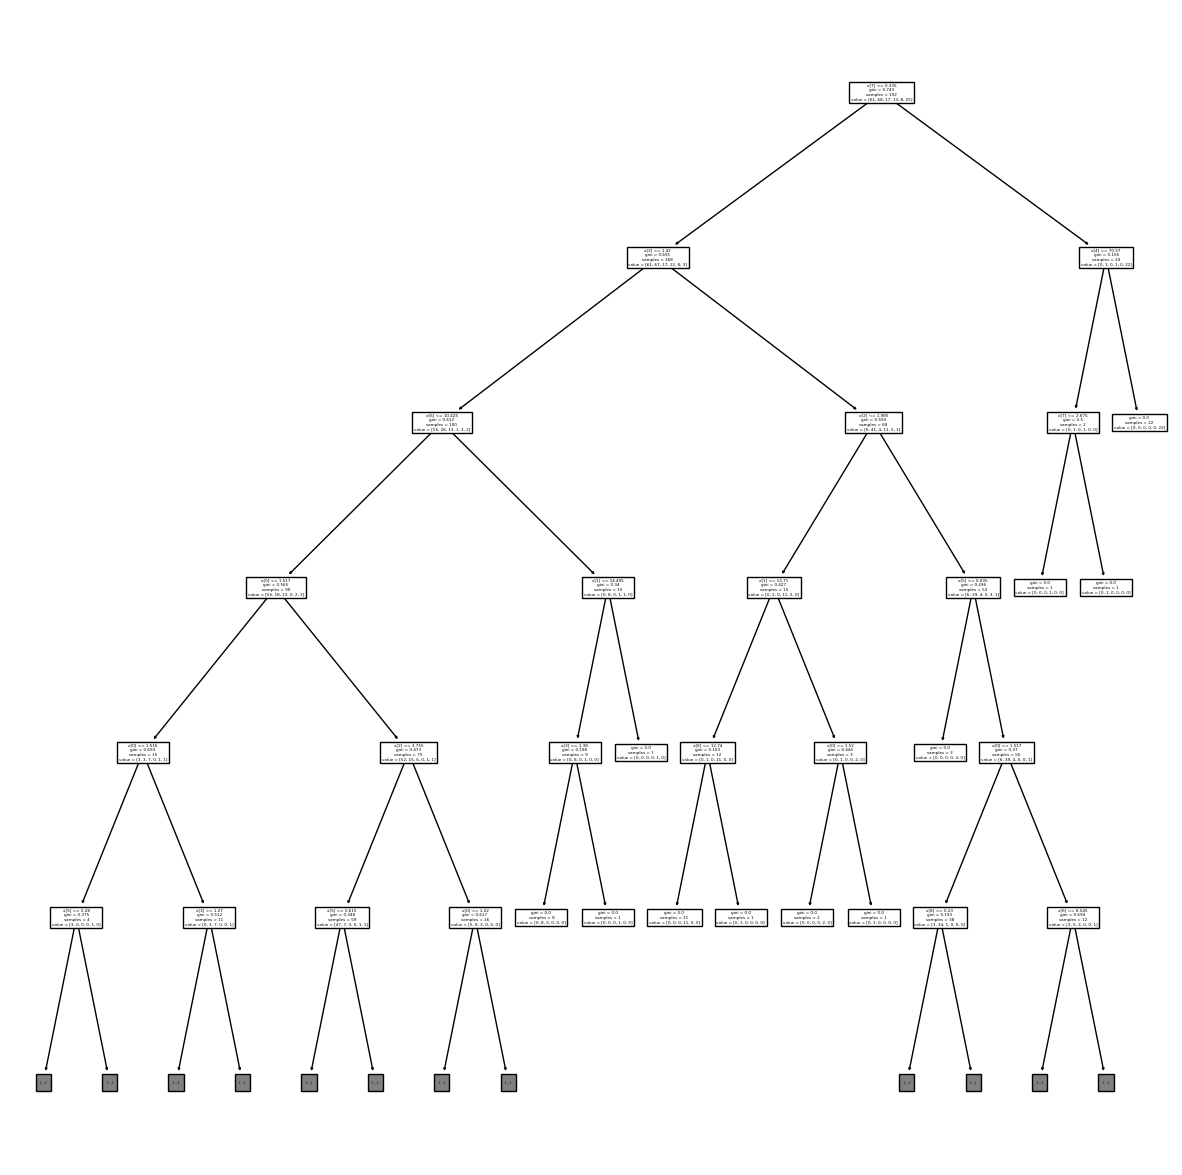

Accuracy (max_depth = 10 ): 0.7272727272727273


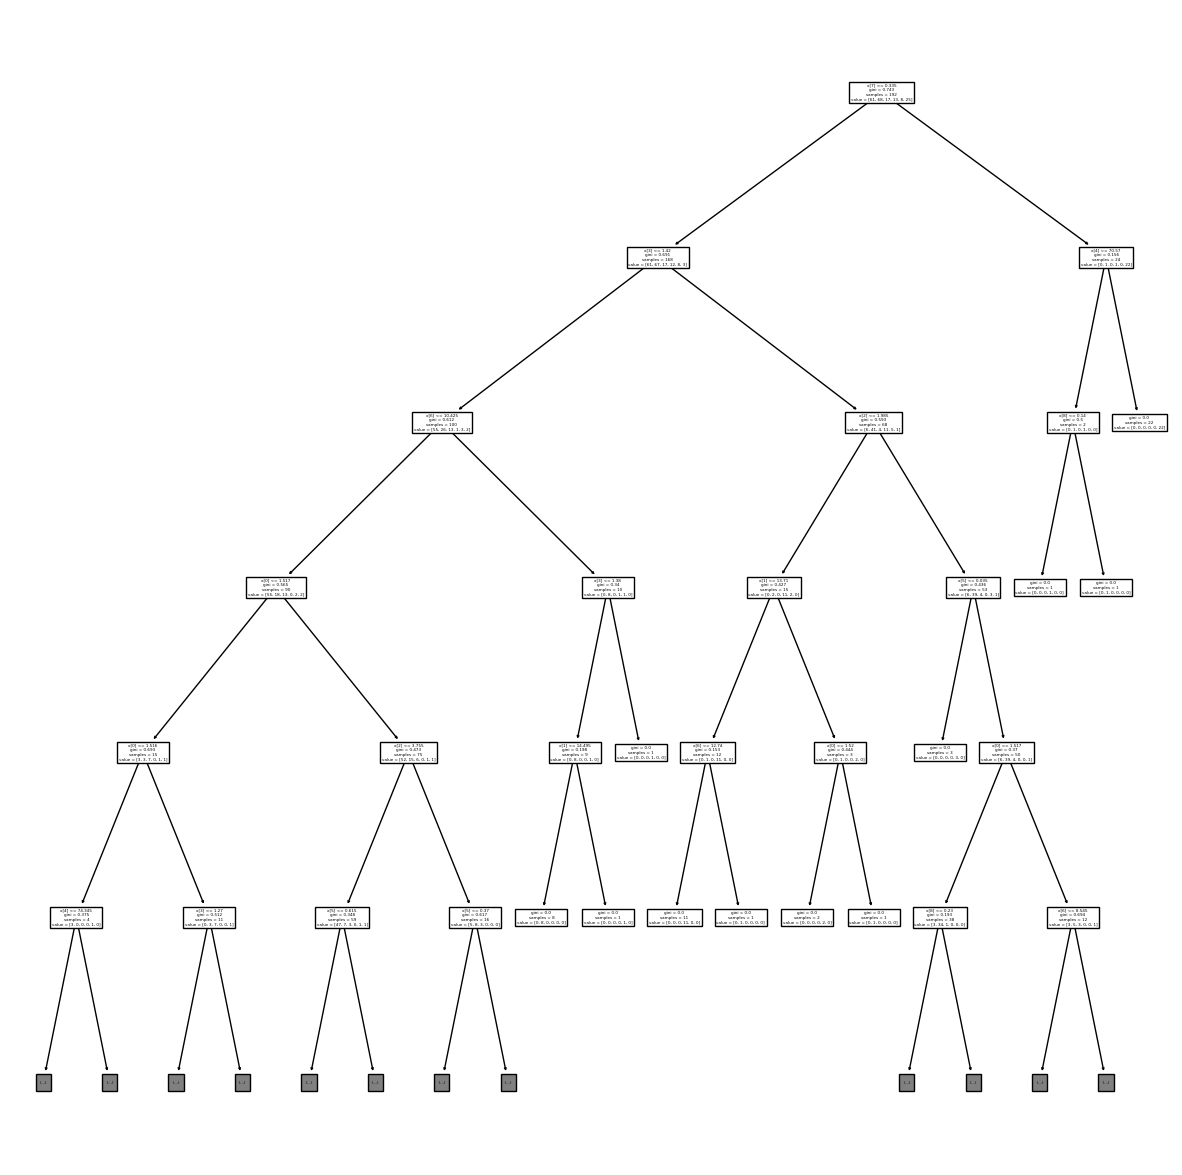

In [328]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# creating a list to store accuracy for different max_depth values
accuracy_scores = []

# iterating over max_depth values from 5 to 10
for max_depth in range(5, 11):
    # creating a Decision Tree Classifier object
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print("Accuracy (max_depth =", max_depth, "):", accuracy)

    # plotting the decision tree
    plt.figure(figsize=(15, 15))
    plot_tree(decision_tree=dt_classifier, max_depth=5)
    plt.show()
